# MAP estimates


In [5]:
import os, sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

import imagine as img
# IMAGINE extension package
import imagine_snrs as img_snrs
import shell

In [6]:
measurements = img.observables.Measurements(img_snrs.datasets.SNR_DA530_I(),
                                            img_snrs.datasets.SNR_DA530_Q(),
                                            img_snrs.datasets.SNR_DA530_U(),
                                            img_snrs.datasets.SNR_DA530_FD())


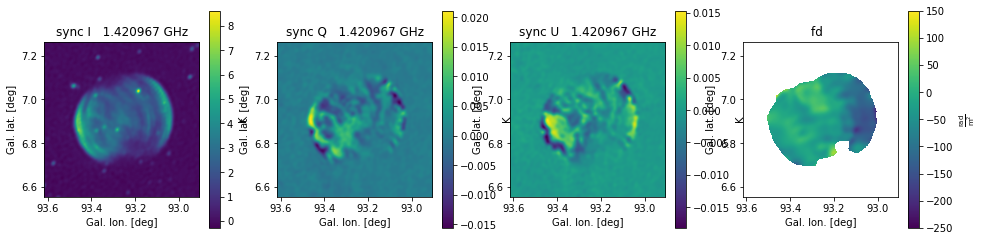

In [7]:
plt.figure(figsize=(16,4))
measurements.show()

In [8]:
measurements.keys()

dict_keys([('sync', 1.420967, 'image', 'I'), ('sync', 1.420967, 'image', 'Q'), ('sync', 1.420967, 'image', 'U'), ('fd', None, 'image', None)])

In [9]:
runs_list = ['uniform_field', 'simple_helical_field', 'BMF_field', 'CK_m0_field', 'CK_m1_field']
runs = {}

runs_dir = '../runs/'
for run in runs_list:
    run_dir = os.path.join(runs_dir, run)
    if not os.path.isfile(os.path.join(run_dir,'pipeline.pkl')):
        continue
    runs[run] = img.load_pipeline(run_dir)



------------------------------ 
 uniform_field 
------------------------------
SNR_unif_magnetic_field
B: 0.1301428745369608 uG
beta: -24.91755631030783 deg
gamma: -18.262538563002558 deg

constant_CR
cr_energy: 1.0 GeV
Ecr_Em: 1.0

SNR_thermal_electrons
initial_electron_density: 5.0023001621512 1 / cm3
shell_V0: 0.0153 pc / yr
shell_a: 1.3
shell_b: 10.0
elapsed_time: 1300.0 yr
shell_radius: 35.0 pc



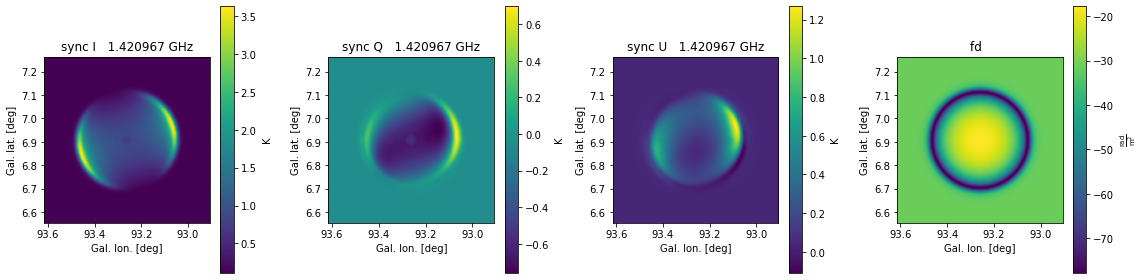

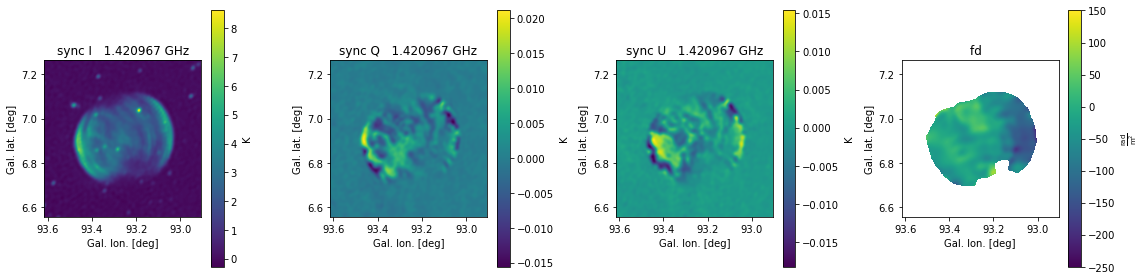



------------------------------ 
 simple_helical_field 
------------------------------
SNR_helical_magnetic_field
B: 0.045749257976968195 uG
alpha: 103.66596387253973 deg
beta: -66.96643980389156 deg
gamma: -64.63490780415736 deg
period: 31.850200611708633 pc

constant_CR
cr_energy: 1.0 GeV
Ecr_Em: 1.0

SNR_thermal_electrons
initial_electron_density: 9.99994039198622 1 / cm3
shell_V0: 0.0153 pc / yr
shell_a: 1.3
shell_b: 10.0
elapsed_time: 1300.0 yr
shell_radius: 35.0 pc



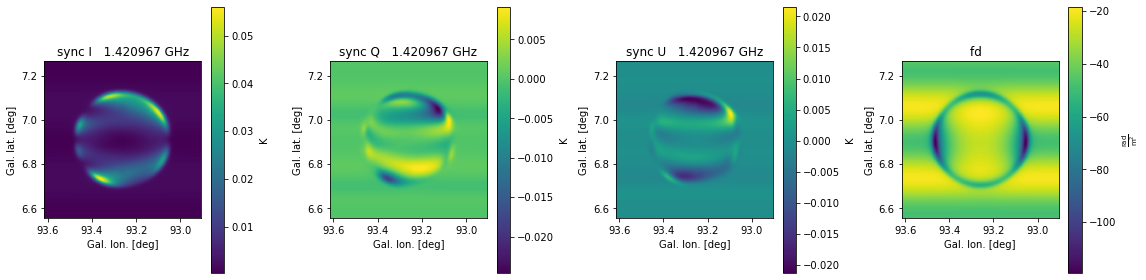

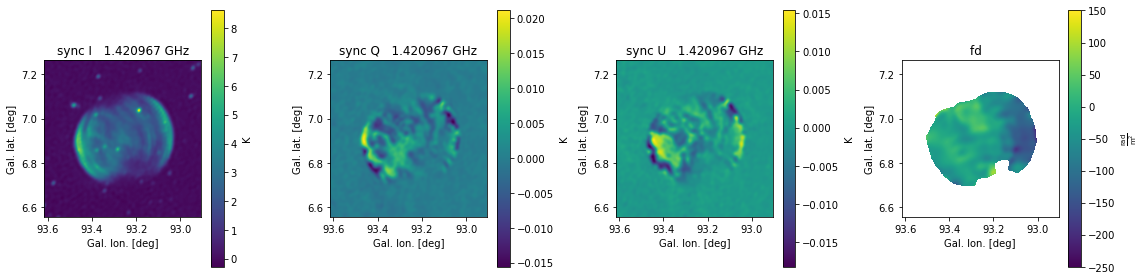



------------------------------ 
 BMF_field 
------------------------------
SNR_BMF_magnetic_field
B: 0.1501013179332383 uG
period: 14.779029634359615 pc
x_shift: 1.4117865515705028 pc
y_shift: -32.507111244370456 pc
alpha: 18.672271855331406 deg
beta: -62.360198637545736 deg

constant_CR
cr_energy: 1.0 GeV
Ecr_Em: 1.0

SNR_thermal_electrons
initial_electron_density: 8.792596682007 1 / cm3
shell_V0: 0.0153 pc / yr
shell_a: 1.3
shell_b: 10.0
elapsed_time: 1300.0 yr
shell_radius: 35.0 pc



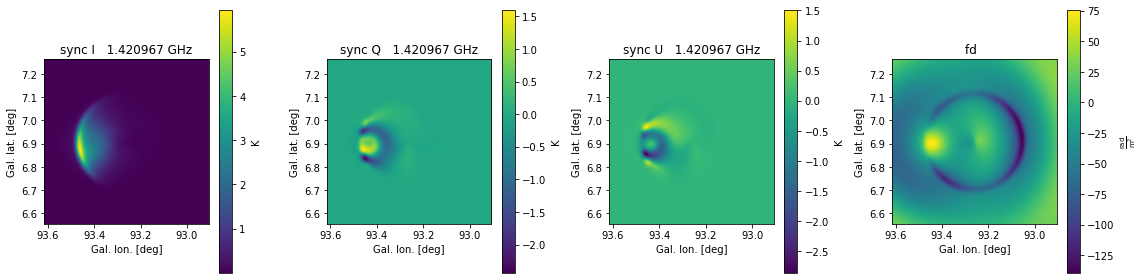

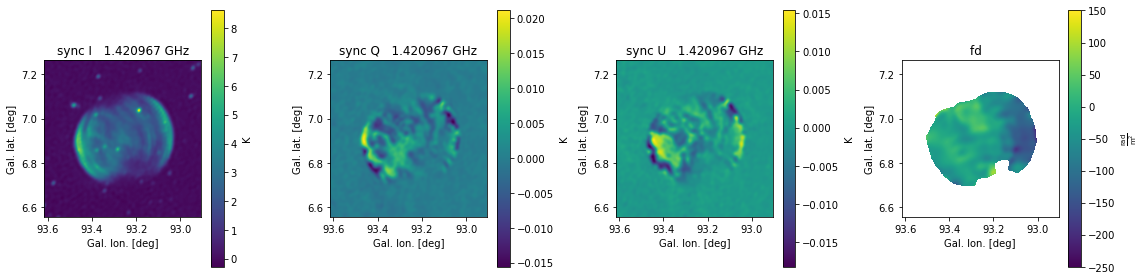



------------------------------ 
 CK_m0_field 
------------------------------
SNR_CK_magnetic_field
B: 0.24582075549282437 uG
m: 0.0
z_shift: 0.0 pc
period: 14.361578543869292 pc
period_z: 30.228301030027435 pc
x_shift: -3.4875036425204087 pc
y_shift: 7.069182074296038 pc
alpha: -8.773733005546552 deg
beta: 50.95424375414446 deg
gamma: -1.0392054633276746 deg

constant_CR
cr_energy: 1.0 GeV
Ecr_Em: 1.0

SNR_thermal_electrons
initial_electron_density: 9.999987129820516 1 / cm3
shell_V0: 0.0153 pc / yr
shell_a: 1.3
shell_b: 10.0
elapsed_time: 1300.0 yr
shell_radius: 35.0 pc



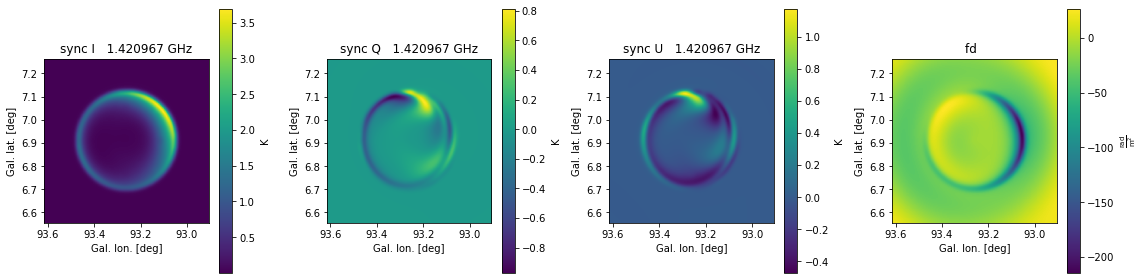

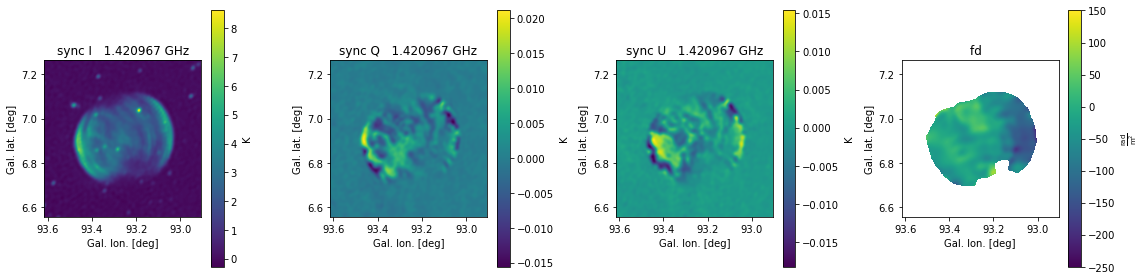



------------------------------ 
 CK_m1_field 
------------------------------
SNR_CK_magnetic_field
B: 0.12465545130578967 uG
m: 1.0
z_shift: 0.0 pc
period: 27.114901384769432 pc
period_z: 219.99999999805266 pc
x_shift: 48.442514192542625 pc
y_shift: 53.527589368467765 pc
alpha: 5.1350700290788485 deg
beta: 0.10267952356574225 deg
gamma: -64.93690749412671 deg

constant_CR
cr_energy: 1.0 GeV
Ecr_Em: 1.0

SNR_thermal_electrons
initial_electron_density: 9.99994039198622 1 / cm3
shell_V0: 0.0153 pc / yr
shell_a: 1.3
shell_b: 10.0
elapsed_time: 1300.0 yr
shell_radius: 35.0 pc



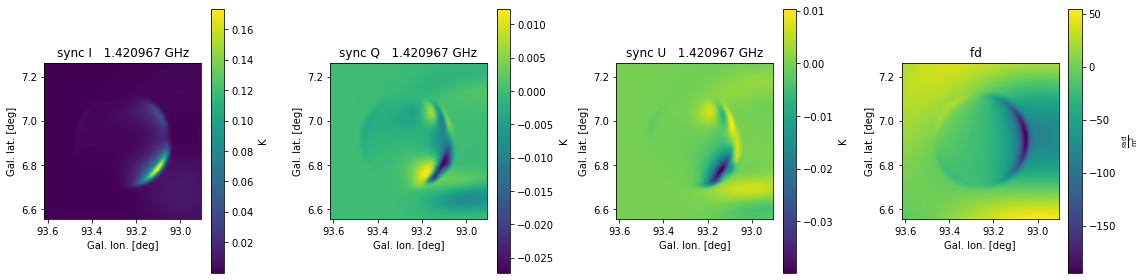

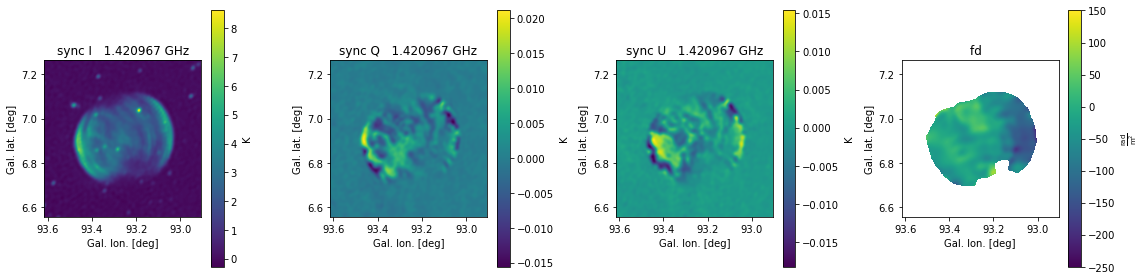

In [10]:
for name in runs_list:
    pipeline = runs[name]
    if pipeline._MAP_model is None:
        print('Skipping', name)
        continue
        
    print('\n\n'+'-'*30,'\n',name,'\n'+'-'*30)
    for field in pipeline.MAP_model:
        print(field.name)
        for p,v in field.parameters.items():
            print(p+':',v)
        print()
    plt.figure(figsize=(16,4))
    pipeline.MAP_simulation.show()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(16,4))
    measurements.show()
    plt.tight_layout()
    plt.show()



------------------------------ 
 uniform_field 
------------------------------
B: 0.1301428745369608 uG
beta: -24.91755631030783 deg
gamma: -18.262538563002558 deg


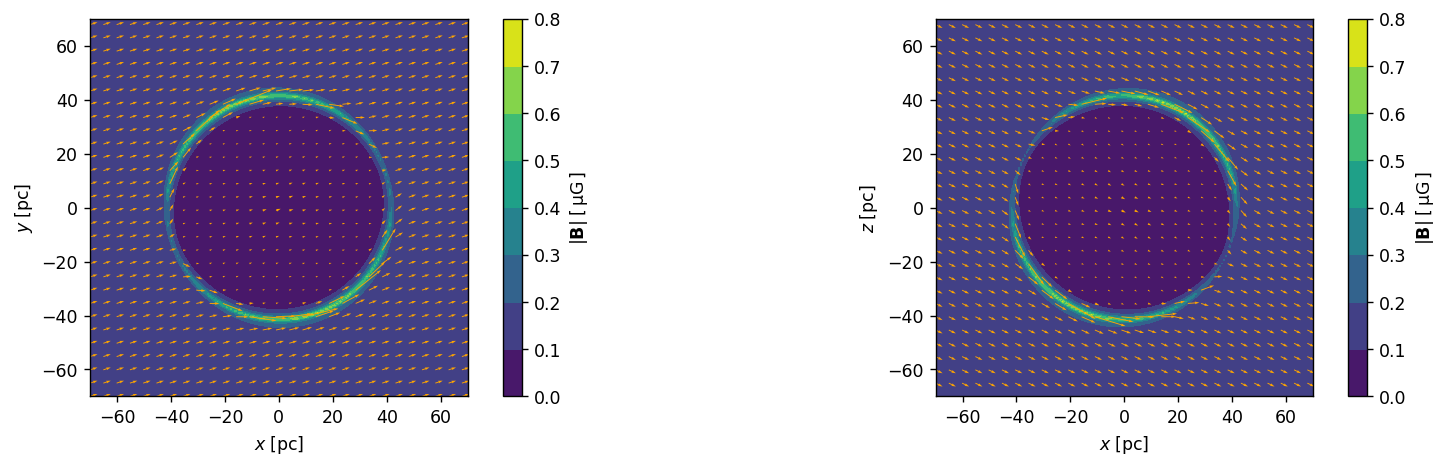



------------------------------ 
 simple_helical_field 
------------------------------
B: 0.045749257976968195 uG
alpha: 103.66596387253973 deg
beta: -66.96643980389156 deg
gamma: -64.63490780415736 deg
period: 31.850200611708633 pc


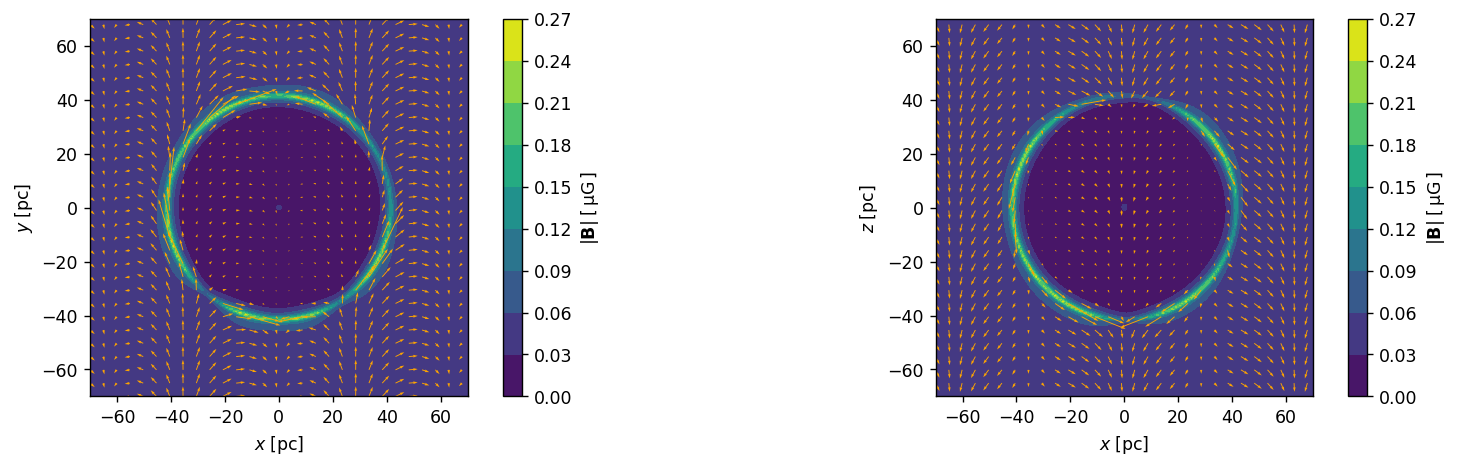



------------------------------ 
 BMF_field 
------------------------------
B: 0.1501013179332383 uG
period: 14.779029634359615 pc
x_shift: 1.4117865515705028 pc
y_shift: -32.507111244370456 pc
alpha: 18.672271855331406 deg
beta: -62.360198637545736 deg


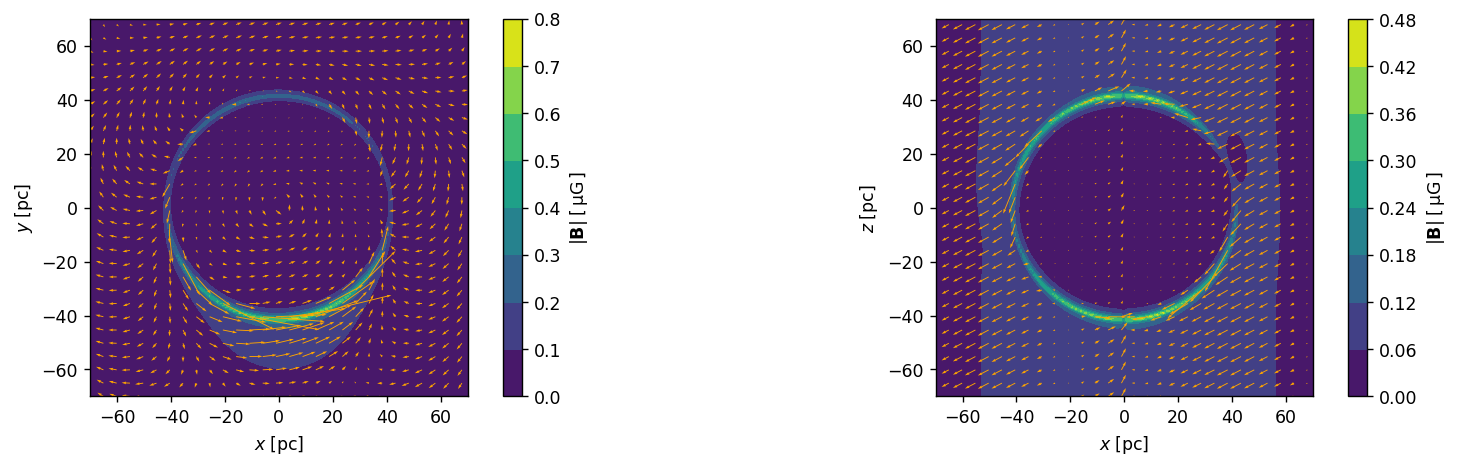



------------------------------ 
 CK_m0_field 
------------------------------
B: 0.24582075549282437 uG
m: 0.0
z_shift: 0.0 pc
period: 14.361578543869292 pc
period_z: 30.228301030027435 pc
x_shift: -3.4875036425204087 pc
y_shift: 7.069182074296038 pc
alpha: -8.773733005546552 deg
beta: 50.95424375414446 deg
gamma: -1.0392054633276746 deg


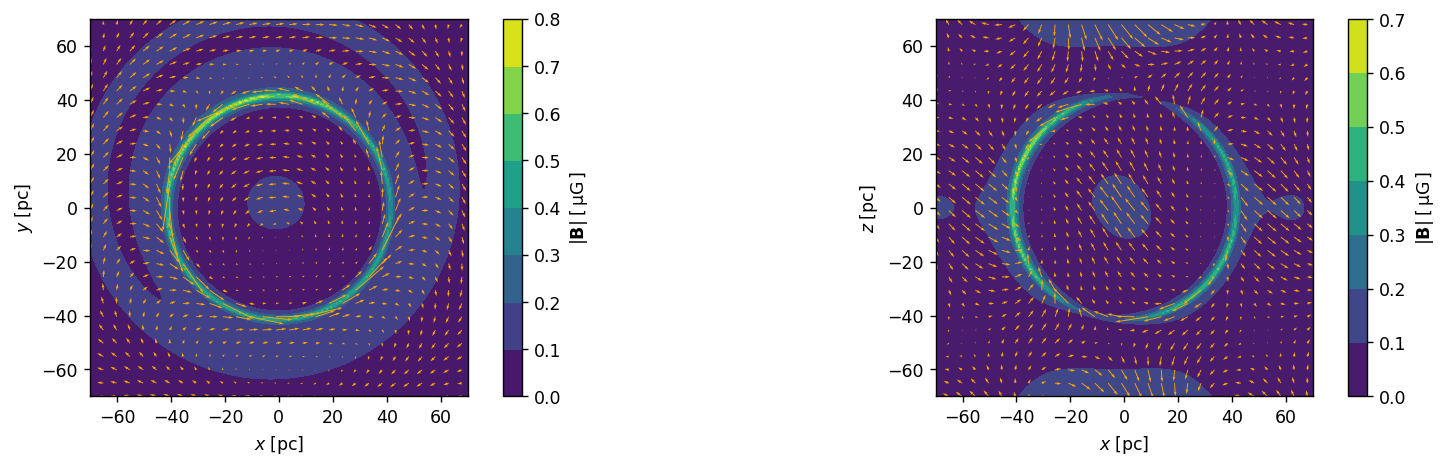



------------------------------ 
 CK_m1_field 
------------------------------
B: 0.12465545130578967 uG
m: 1.0
z_shift: 0.0 pc
period: 27.114901384769432 pc
period_z: 219.99999999805266 pc
x_shift: 48.442514192542625 pc
y_shift: 53.527589368467765 pc
alpha: 5.1350700290788485 deg
beta: 0.10267952356574225 deg
gamma: -64.93690749412671 deg


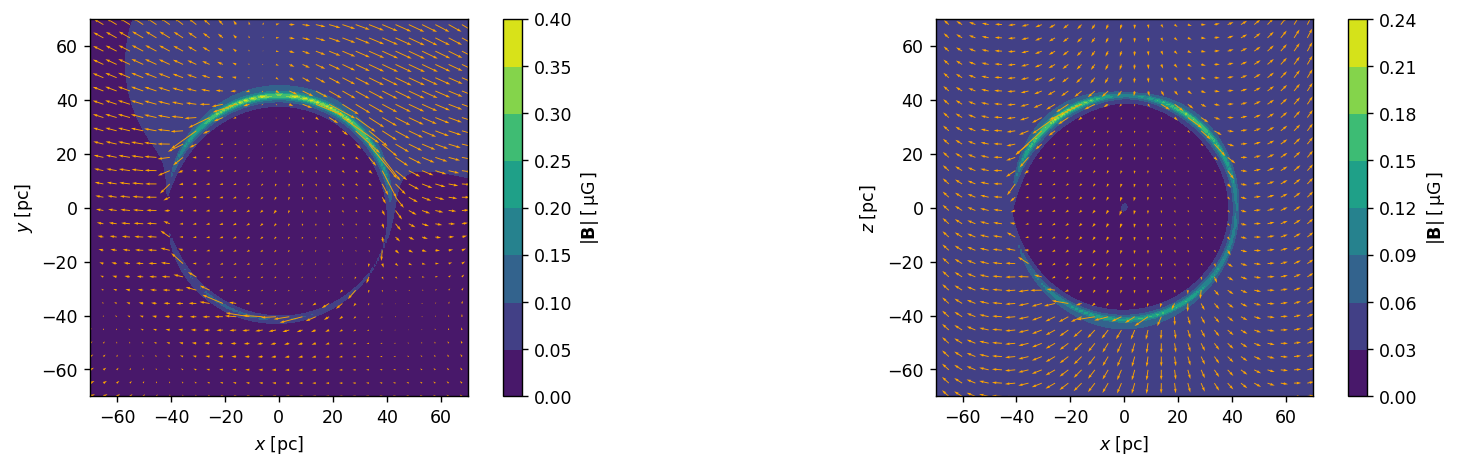

In [12]:
for name in runs_list:
    pipeline = runs[name]
    if pipeline._MAP_model is None:
        print('Skipping', name)
        continue
        
    print('\n\n'+'-'*30,'\n',name,'\n'+'-'*30)
    for p,v in pipeline.MAP_model[0].parameters.items():
        print(p+':',v)

    grid = pipeline.MAP_model[0].grid
    B = pipeline.MAP_model[0].get_data()
    
    plt.figure(figsize=(16,4), dpi=125)
    ax = plt.subplot(121)
    shell.visualization.plot_vector_xy(grid, [B[...,i] for i in range(3)], skip=7, ax=ax)
    ax = plt.subplot(122)
    shell.visualization.plot_vector_xz(grid, [B[...,i] for i in range(3)], skip=7, ax=ax)
    plt.show()